33
1/33
2/33
3/33
4/33
5/33
6/33
7/33
8/33
9/33
10/33
11/33
12/33
13/33
14/33
15/33
16/33
17/33
18/33
19/33
20/33
21/33
22/33
23/33
24/33
25/33
26/33
27/33
28/33
29/33
30/33
31/33
32/33
33/33
[-0.5695638122634891, 2.8452550950522184, -0.3092376000406753, 0.5984239980559777, 1.3677179273269153, 1.578509488681425, -0.3679622675831216, 0.42631425549740704, 0.6437848127728948, 0.34077240083659793, -0.24054634548217585, 0.871655975839104, 1.037310682752197, 1.2653039171989477, 0.2817542485693615, 0.6458376012574922, -0.21947713980084035, -0.9722324194124214, -0.14486347019430398, -2.365579783405997, -1.1819254237984311, -1.0245507253846877, -0.35976557038182544, 0.01644650892775481, -0.6108726823198438, 0.6633698305783486, -0.8950534053480999, -0.4406020970133607, -1.802334122580542, 0.2093833637720317, -0.6208319074834902, -0.21029062899083248, -0.4561507056345362]
           x         y color
0  -0.574137  0.128208  mfcc
1   0.680309  0.972539  mfcc
2   1.003222  0.161683  mfcc
3   0.1711

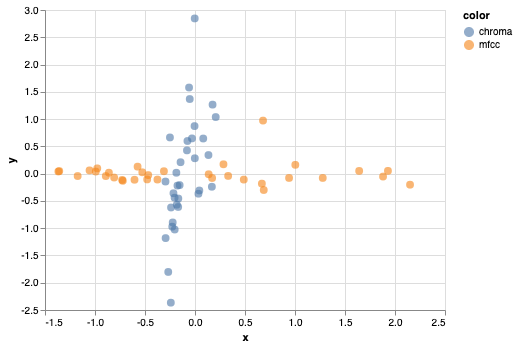

In [1]:
%matplotlib inline
import glob
import numpy as np
import librosa
import os
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import vega
import altair as alt
import pandas as pd
import scipy.signal
import scipy.fftpack as fft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#File reading
all_dirs = []
for root, dirs, files in os.walk('./Test'):
        for name in files:
            if '.wav' in name:
                filedir = os.path.join(root, name)
                all_dirs.append(filedir)

all_chroma = []
all_mfcc = []
file_no = len(all_dirs)
print(file_no)
for i in range(file_no):
    print(str(i+1) + '/' + str(file_no))
    #Load file
    y, sr = librosa.core.load(all_dirs[i])
    #Features
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=48, n_octaves=7)
    all_mfcc.append(mfcc.flatten())
    all_chroma.append(chroma.flatten())

#Shift mffcs to positive values
#min = np.amin(all_mfcc)
#all_mfcc = all_mfcc + min

#Standardization
scl1 = StandardScaler()
all_mfcc_scaled = scl1.fit_transform(all_mfcc)
scl2 = StandardScaler()
all_chroma_scaled = scl2.fit_transform(all_chroma)

#Principal Component Analysis

#MFCC2
pca_mfcc2 = PCA(n_components=2).fit_transform(all_mfcc_scaled)
scl3 = StandardScaler()
pca_mfcc2 = scl3.fit_transform(pca_mfcc2)
pca_mfcc2x = []
pca_mfcc2y = []
for i in range(pca_mfcc2.shape[0]):
    pca_mfcc2x.append(pca_mfcc2[i][0])
for i in range(all_mfcc_scaled.shape[0]):
    pca_mfcc2y.append(pca_mfcc2[i][1])

#MFCC1
pca_mfcc = PCA(n_components=1).fit_transform(all_mfcc_scaled)
scl4 = StandardScaler()
pca_mfcc = scl4.fit_transform(pca_mfcc)
pca_mfcc1 = []
for i in range(pca_mfcc.shape[0]):
    pca_mfcc1.append(pca_mfcc[i][0])

#CHROMA1
pca_chroma = PCA(n_components=1).fit_transform(all_chroma_scaled)
scl5 = StandardScaler()
pca_chroma = scl5.fit_transform(pca_chroma)
pca_chroma1 = []
for i in range(pca_chroma.shape[0]):
    pca_chroma1.append(pca_chroma[i][0])

#Dimensionality reduction
#all_mfcc_scaled_red = TSNE(n_components=1, perplexity = 10.0).fit_transform(all_mfcc_scaled)
#all_chroma_scaled_red = TSNE(n_components=1, perplexity = 10.0).fit_transform(all_chroma_scaled)
#print('Computation complete.')


#Creating dataframe
#x = []
#y = []
#z = []
# for i in range(len(all_mfcc_scaled_red2)):
#     x.append(all_mfcc_scaled_red2[i][0])
# for i in range(len(all_mfcc_scaled_red2)):
#     y.append(all_mfcc_scaled_red2[i][1])
# for i in range(len(all_chroma_scaled_red1)):
#     z.append(all_mfcc_scaled_red2[i][0])
print(pca_chroma1)

feature1 = []
feature2 = []
for i in range(len(pca_mfcc2x)):
    feature1.append('mfcc')
for i in range(len(pca_mfcc1)):
    feature2.append('chroma')
    
df1 = pd.DataFrame({'x': np.asarray(pca_mfcc2x), 'y': np.asarray(pca_mfcc2y)/5, 'color': np.asarray(feature1)})
df2 = pd.DataFrame({'x': ((np.asarray(pca_mfcc1)/7)-0.1), 'y': np.asarray(pca_chroma1), 'color': np.asarray(feature2)})
df3 = pd.DataFrame({'x': np.asarray(pca_mfcc2x), 'y': np.asarray(pca_mfcc2y)/2, 'color': np.asarray(feature1)})
print(df1)
print(df2)

viz1 = alt.Chart(df1).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='color:N').interactive()
#.configure_mark(opacity=0.5, color='cyan').interactive()
viz2 = alt.Chart(df2).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='color:N').interactive()
#.configure_mark(opacity=0.5, color='magenta').interactive()
viz1+viz2
#viz3 = alt.Chart(df3).mark_circle(opacity=0.0, size=60).encode(x='x', y='y', color='color:N').interactive()
#viz2+viz3
#x=alt.X('x:Q', title='MFCC1'),
#y=alt.Y('y:Q', title='MFCC2'),
#z=alt.Z('z:Q', title='CHROMA')).add_selection(brush)
#alt.condition(brush, 'location:N', alt.value('grey')),
#     tooltip=['filename', 'location', 'ethnic_group', 'original_format', 'recorded_from_date', 'recording_context', ],
#     href='local_path'

#plt.scatter(np.asarray(pca_mfcc2x), np.asarray(pca_mfcc2y)/3, c='c', alpha=0.5)
#plt.scatter(np.asarray(pca_mfcc1)/8, np.asarray(pca_chroma1), c='m', alpha=0.5)
#plt.show()
